In [51]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [65]:
import pandas as pd


(train_images, train_labels), (test_images, test_labels)=pd.read_csv('train_step.csv');

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

ValueError: too many values to unpack (expected 2)

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [59]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 0.5551 - accuracy: 0.8047 - val_loss: 0.9158 - val_accuracy: 0.6986
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5176 - accuracy: 0.8179 - val_loss: 0.9280 - val_accuracy: 0.7111
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.4803 - accuracy: 0.8295 - val_loss: 0.9594 - val_accuracy: 0.7049
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.4546 - accuracy: 0.8399 - val_loss: 1.0278 - val_accuracy: 0.7022
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4219 - accuracy: 0.8492 - val_loss: 1.0146 - val_accuracy: 0.7014
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3978 - accuracy: 0.8592 - val_loss: 1.0679 - val_accuracy: 0.6985
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.3712 - accuracy: 0.8674 - val_loss: 1.1466 -

313/313 - 7s - loss: 1.3015 - accuracy: 0.6929 - 7s/epoch - 23ms/step


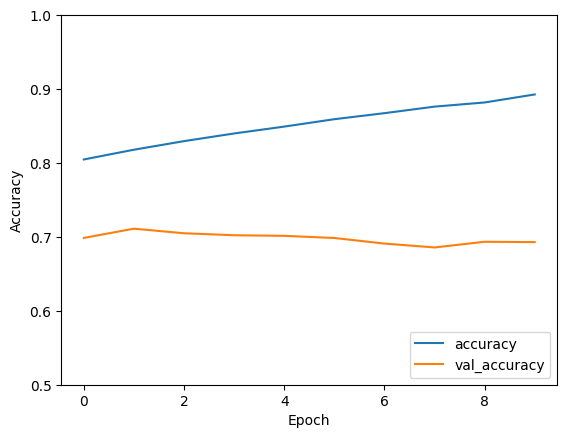

In [60]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [61]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6929000020027161


In [40]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [41]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2164, 6)
x_test shape (241, 6)
y_train shape (2164,)
y_test shape (241,)


In [44]:
!pip install keras

In [48]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=8b0685559758a5640f6c26fe88e5327241d50786187812f76d85e0bb6891389d
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [50]:
!pip install keras.utils.np_utils

ERROR: Could not find a version that satisfies the requirement keras.utils.np_utils (from versions: none)
ERROR: No matching distribution found for keras.utils.np_utils


In [49]:
#
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

ModuleNotFoundError: No module named 'keras.utils.np_utils'